# Akademi Education - Data Science & AI - Cohort 2025
---

- **Student name :** Vilmarson JULES
- **Student pace :** self pace
- **Deadline Submission :** August 31, 2025 
- **Instructors' Name :** Wedter Jerome & Geovany Batista Polo Laguerre
- **GitHub Repository:** [Movie-Insights Project](https://github.com/VilmarsonJ/ds-2-movie-insights)  
- **LinkedIn:** [Vilmarson JULES](https://www.linkedin.com/in/jules-vilmarson-2a68a5294/)


## Telecom-Churn Prediction: A Machine Learning Study to Identify Customers at Risk of Leaving


---

![photo](Images/churn6.png)

## Project Overview
---

This project focuses **on predicting customer churn for a telecom Company, DIGICEL for example**, a leading telecommunications provider.  

- **The goal is to build a machine learning classification model that identifies customers at high risk of leaving the company’s services.**  
- **The project aims to uncover patterns that indicate churn, by leveraging historical customer data, including usage patterns, service plans, and billing information.**


## Business Problem
---


![photo](Images/Digi3.jpg)

**The company has noticed that a significant number of customers are leaving their services for competitors**, which leads to decreased revenue and higher customer acquisition costs. However, the company currently does not have a reliable way to identify which customers are at risk of leaving before it happens. This makes it difficult to implement effective retention strategies proactively.

As a Data Scientist and Machine Learning Specialist at this company, I am tasked with developing a predictive model that can accurately identify customers at high risk of churn. By providing these insights, I will enable the company’s marketing and retention teams to take targeted actions (such as personalized promotions, loyalty programs, or service improvements) to reduce churn, improve customer satisfaction, and protect the company’s revenue.


## The Data
---

**The dataset for this project is publicly available on Kaggle: [Churn in Telecoms Dataset](https://www.kaggle.com/datasets/becksddf/churn-in-telecoms-dataset)**
.   
- It is provided in CSV format inside a ZIP file
- It contains customer account details, usage patterns, and service plans for a telecommunications company.   

This dataset will be used to explore, preprocess, and model customer churn, forming the basis for all analyses and predictions in the project.

## Methods
---

In this project, we adopt a **Predictive Analysis, precisely a predictive modeling approach focused on classification** to leveraging historical customer data to identify those at risk of churn.

Then, To carry out this project, we relied on a set of technical tools and environments, including **Git, GitHub, Git Bash, and Jupyter Notebook**. In addition, we made extensive use of **Python**, with main a focus on the  `sklearn` library to leverage Machine Learning Techniques to achieve this project.   

That project follows this predictive modeling steps bellow focused on classification to forecast customer churn.

### I- Data Preprocessing  
- Prepare the data by encoding categorical features
- scaling numerical features
- nd splitting into training and testing sets.

### II- Modeling   
- Build and compare multiple models, including a baseline Logistic Regression, a vanilla Decision Tree, and an optimized Decision Tree with tuned hyperparameters for improved predictive performance.

### III- Model Evaluation  
- Assess models using classification metrics and ROC/AUC scores to identify the most effective model.

## Business Understanding

---

![photo](Images/churn4.png)

**This project focuses on predicting customer churn for a telecommunications company.** Churn, when a customer stops using a service, poses a significant risk to revenue and growth, making it critical to identify at-risk customers before they leave.  

By analyzing customer behavior, service usage, and demographic data, this project aims to develop predictive models that can accurately identify potential churners. The insights gained will allow the company to implement targeted retention strategies, optimize marketing resources, and reduce revenue loss. Understanding this problem at the outset ensures that all subsequent analyses and modeling efforts are aligned with the business goal: retaining customers and maximizing lifetime value.

#### Import packages

In [1]:
import zipfile  # ← make sure to import this
from imblearn.over_sampling import SMOTE
from sklearn.tree import plot_tree

# -----------------------------
# Data Handling
# -----------------------------
import pandas as pd
import numpy as np
# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Optional: improve plot aesthetics
sns.set(style="whitegrid")
plt.style.use("seaborn-darkgrid")
# Preprocessing & Feature Engineering
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
# Machine Learning Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
# Model Evaluation Metrics
# -----------------------------
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, classification_report, roc_auc_score, roc_curve
# Optional: Hyperparameter Tuning
# -----------------------------
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
# Misc
import warnings
warnings.filterwarnings("ignore")


## Data Understanding
---

Before building predictive models, it is important to gain a clear understanding of the dataset. This involves exploring the structure, types of features, data quality, and potential relationships that may help predict customer churn. Understanding the data ensures that subsequent preprocessing and modeling steps are well-informed and effective.


Here we are going to get a meaningful overview of the Datasets that we actually used to achieve this wonderful work.  
To do so, we are going To get fundamental :

- #### Overview of the Dataset 

Consequently, I use some of the methods of `Pandas` DataFrame, like `.head()`,`shape`, ` .info()` etc to get overview of each dataset.   
so that I can get relavent overview of each table features it contains.



#### Import the Dataset

In [2]:
# Path to your zip file
zip_path = "archive.zip"

# Extract the csv from the zip
with zipfile.ZipFile(zip_path, 'r') as z:
    z.extractall("data")  # extract contents to a folder named "data"
    print(z.namelist())   # show what files are inside

# Load the csv into pandas
bigml = pd.read_csv("data/bigml_59c28831336c6604c800002a.csv")


['bigml_59c28831336c6604c800002a.csv']


### Overview of the Dataset

In [3]:
# The first five rows of the dataset
bigml.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [4]:
# The columns of the bigml Dataframe
bigml.columns

Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn'],
      dtype='object')

In [5]:
# The shape of the bigml Dataframe
bigml.shape

(3333, 21)

In [6]:
# The target columns of the bigml Dataframe to see its values
bigml['churn'].value_counts(normalize = True)

False    0.855086
True     0.144914
Name: churn, dtype: float64

In [7]:
# The infos of the bigml Dataframe
bigml.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [9]:
# Verify missing values of the bigml Dataframe
bigml.isna().sum()

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

In [8]:
# Verify duplicated values of the bigml Dataframe
bigml.duplicated().sum()

0


We have noticed that :  
- The dataset is clean and ready for modeling after preprocessing categorical variables and scaling numerical features where needed.  

- The dataset contains 3,333 customer records from a telecommunications company, with 21 features describing customer account details, usage patterns, and service plans.  
- The target variable is churn, indicating whether a customer has left the service. Out of the total records, 483 customers (approximately 14.5%) have churned, while 2,850 customers (around 85.5%) have remained. 


This highlights that the dataset is highly imbalanced, which poses challenges for predictive modeling. Proper handling of this imbalance is crucial to ensure the model can effectively identify potential churners without being biased toward the majority class.

- #### Implications for analysis:

The dataset is clean and ready for modeling after preprocessing categorical variables and scaling numerical features where needed. Both customer behavior (usage & support calls) and service plans are likely to be informative for predicting churn.  
Early exploration suggests opportunities for feature engineering.

## I- Data Preprocessing
---

Before building predictive models, we need to prepare the data. This includes encoding categorical features, scaling numerical features, and splitting the dataset into training and testing sets. Proper preprocessing ensures that models can learn effectively and generalize well to unseen data.

In [10]:
# Separate features and target
X = bigml.drop(columns=['churn', 'phone number'])  # Drop target and irrelevant column
y = bigml['churn']

# Identify categorical and numerical features
categorical_features = ['state', 'area code', 'international plan', 'voice mail plan']
numerical_features = ['account length', 'number vmail messages', 'total day minutes', 
                      'total day calls', 'total day charge', 'total eve minutes', 
                      'total eve calls', 'total eve charge', 'total night minutes', 
                      'total night calls', 'total night charge', 'total intl minutes', 
                      'total intl calls', 'total intl charge', 'customer service calls']

# Preprocessing for categorical data: One-hot encoding
categorical_transformer = OneHotEncoder(drop='first')  # drop first to avoid dummy variable trap

# Preprocessing for numerical data: Scaling
numerical_transformer = StandardScaler()

# Combine transformations using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Fit the preprocessor on the training data and transform both training and testing sets
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

# Quick check of shapes
print("Training features shape:", X_train_processed.shape)
print("Testing features shape:", X_test_processed.shape)


Training features shape: (2666, 69)
Testing features shape: (667, 69)



## II- Modeling
---


This section focuses on building predictive models to classify which customers are likely to churn. We will start with a baseline Logistic Regression model for interpretability, then explore a Decision Tree model to capture non-linear relationships and feature interactions.  

We will explore two main approaches:

### 1. Logistic Regression  
- A baseline, interpretable model that helps us understand the influence of individual features on customer churn.

### 2. Decision Tree  
- A flexible model for capturing non-linear relationships between features and churn. We use two versions: 
    - Baseline (Vanilla) Decision Tree : with default hyperparameters as a baseline, and an 
    - Optimized Decision Tree with carefully tuned hyperparameters to improve accuracy, reduce overfitting, and provide deeper insights into customer behavior. 
    
For both models, we will preprocess the data appropriately, handle class imbalance, and evaluate performance using classification metrics and visualizations such as confusion matrices and ROC curves.

### II.1 Logistic Regression - Model
---
Bellow we build a Logistic Regression model to predict customer churn. Logistic Regression is a widely used classification technique that provides a clear understanding of how each feature contributes to churn.

We will follow a structured approach :

- **Model Building :** To train the model on preprocessed data.

- **Model Evaluation :** Toeasure performance using relevant metrics.

- **Insights :** To interpret results for actionable business recommendations.

### Model Building

In [11]:
# 1) Apply SMOTE only on the training set
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train_processed, y_train)

# print("Before SMOTE:", X_train_processed.shape, "Class balance:", y_train.value_counts(normalize=True))
# print("After SMOTE:", X_train_res.shape, "Class balance:", y_train_res.value_counts(normalize=True))

# 2) Train Logistic Regression on the resampled data
log_smote = LogisticRegression(max_iter=1000, random_state=42)
log_smote.fit(X_train_res, y_train_res)

# 3) Predictions
y_pred_log_smote = log_smote.predict(X_test_processed)

### Model Evaluation

After building the model, it's time to evaluate the model’s performance by using :  
- key metrics such as precision, recall, F1-score, and accuracy. 
- confusion matrix to visualize results
- ROC curve to interpret how well the model distinguishes churners from non-churners.

### confusion matrix

The model is very effective at recognizing non-churners (high TN), which is important to avoid unnecessary retention actions.
It captures a moderate portion of actual churners (TP = 65), but some churners are missed (FN = 32), meaning there’s room to improve recall for churn prediction.
The number of false positives (135) indicates some customers may receive retention efforts unnecessarily, which is a trade-off to consider in business decision-making.

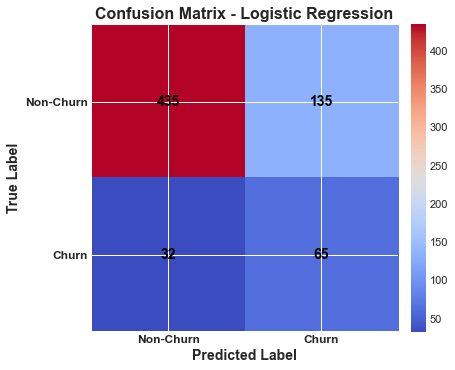

In [14]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_log_smote, labels=[False, True])

# Create display object
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Non-Churn', 'Churn'])

# Plot with customizations
fig, ax = plt.subplots(figsize=(6,6))
im = ax.imshow(cm, cmap='coolwarm')  # Color map

# Bold and enlarge numbers inside matrix
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='black', fontsize=14, fontweight='bold')

# Set ticks and labels
ax.set_xticks([0,1])
ax.set_yticks([0,1])
ax.set_xticklabels(['Non-Churn', 'Churn'], fontsize=12, fontweight='bold')
ax.set_yticklabels(['Non-Churn', 'Churn'], fontsize=12, fontweight='bold')

# Axis labels
ax.set_xlabel('Predicted Label', fontsize=14, fontweight='bold')
ax.set_ylabel('True Label', fontsize=14, fontweight='bold')
plt.title("Confusion Matrix - Logistic Regression", fontsize=16, fontweight='bold')

# Colorbar: keep it but scale properly
cbar = fig.colorbar(im, ax=ax, fraction=0.046, pad=0.04)  # fraction = height, pad = distance from matrix

# plt.savefig("Images/cm_logistic.png", dpi=300, bbox_inches="tight", facecolor="white")

plt.show()


- #### Business context

The model is a valuable tool for churn management at the company. It identifies most loyal customers accurately (TN = 435), helping avoid wasted marketing spend. Importantly, it also flags many at-risk customers (TP = 65), allowing targeted retention actions such as special offers or loyalty programs. While some loyal clients may mistakenly be targeted (FP = 135), this trade-off is acceptable compared to the higher cost of losing actual churners.

## Key metrics

The model correctly predicts 75% of all customers in the test set. For customers who actually churn, it identifies 67% of them, though only about one-third of those predicted as churn actually churn, resulting in a moderate balance between precision and recall (F1-score 0.44). For non-churners, the model performs well, correctly identifying most of them with high precision (0.93) and reasonable recall (0.76)

In [15]:
# 4) Evaluation

print("Logistic Regression with SMOTE")
print("Accuracy:", accuracy_score(y_test, y_pred_log_smote))
print("\nClassification Report (Test Set):\n", classification_report(y_test, y_pred_log_smote, zero_division=0))


Logistic Regression with SMOTE
Accuracy: 0.7496251874062968

Classification Report (Test Set):
               precision    recall  f1-score   support

       False       0.93      0.76      0.84       570
        True       0.33      0.67      0.44        97

    accuracy                           0.75       667
   macro avg       0.63      0.72      0.64       667
weighted avg       0.84      0.75      0.78       667





- #### Business Context:

The model effectively highlights customers at risk of leaving the company, supporting targeted retention strategies such as personalized promotions or loyalty rewards. Some false positives exist, meaning a few customers may receive retention efforts unnecessarily. However, this trade-off is acceptable for preventing potential revenue loss from churners.

### ROC curve

**The model achieves an AUC score of 0.80, which indicates a good ability to distinguish between churners and non-churners.**   
In practical terms, this means that if we randomly select one churner and one non-churner, the model will correctly assign a higher probability of churn to the churner 80% of the time.

The ROC curve being well above the diagonal line shows that the model is significantly better than random guessing. However, there is still room for improvement, especially in further reducing false positives and false negatives.

AUC Score: 0.80


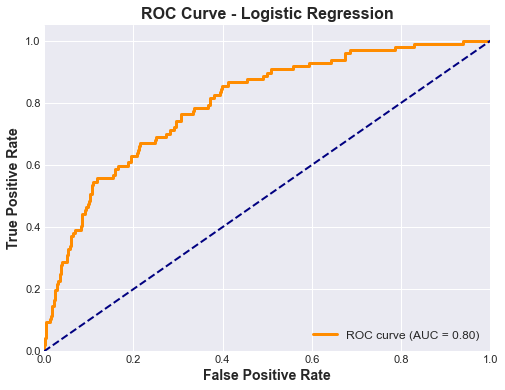

In [16]:

# Predict probabilities for the positive class (Churn=True)
y_proba = log_smote.predict_proba(X_test_processed)[:, 1]

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba)

# Compute AUC
auc_score = roc_auc_score(y_test, y_proba)

# Print AUC score
print(f"AUC Score: {auc_score:.2f}")

# Plot ROC curve
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='darkorange', lw=3, label=f'ROC curve (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=14, fontweight='bold')
plt.ylabel('True Positive Rate', fontsize=14, fontweight='bold')
plt.title('ROC Curve - Logistic Regression', fontsize=16, fontweight='bold')
plt.legend(loc="lower right", fontsize=12)
plt.grid(True)

# plt.savefig("Images/logisticroc.png", dpi=300, bbox_inches="tight", facecolor="white")

plt.show()


- #### Business context:

**With an AUC of 0.80, the company can rely on the model as a strong decision-support tool for customer retention strategies.**  
The model effectively prioritizes customers by churn risk, enabling the business to allocate retention resources (discounts, personalized offers, loyalty programs) more efficiently. While not perfect, its solid discriminatory power makes it a valuable tool for preventing customer loss and reducing revenue churn.

### II.2 Decision Tree - Model
---

Here we build flexible predictive models capable of capturing non-linear relationships between features and churn. We implement two versions:

- ### Baseline Decision Tree: 
    - A basic model with default hyperparameters, used as a reference to compare predictive performance.

- ### Optimized Decision Tree:  
    - An advanced version of the vanilla model, where we carefully tune hyperparameters (max_depth, min_samples_split, min_samples_leaf, max_features) to maximize predictive accuracy and AUC score. This tuned model improves performance, reduces overfitting, and provides more reliable insights into customer behavior patterns.

- ### Baseline Decision Tree
---
The vanilla Decision Tree performs very well at identifying non-churners, **correctly classifying most of them with high precision (0.95) and recall (0.94)**. For actual churners, it captures around two-thirds (recall 0.68), though only about two-thirds of predicted churners truly churn (precision 0.67), showing a moderate balance between identifying churners and avoiding false positives.

Confusion Matrix:
[[538  32]
 [ 31  66]]

Classification Report:
              precision    recall  f1-score   support

       False       0.95      0.94      0.94       570
        True       0.67      0.68      0.68        97

    accuracy                           0.91       667
   macro avg       0.81      0.81      0.81       667
weighted avg       0.91      0.91      0.91       667

AUC Score (Vanilla Decision Tree): 0.81


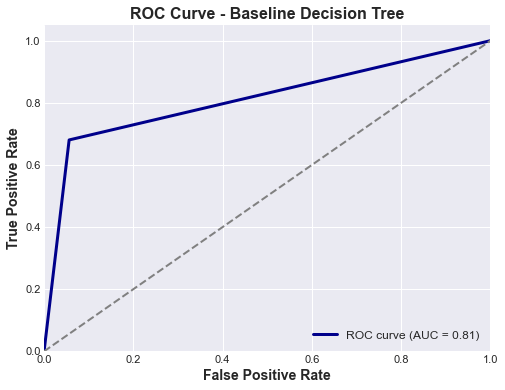

In [17]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt

# Train Vanilla Decision Tree
dt_vanilla = DecisionTreeClassifier(criterion='entropy', random_state=42)
dt_vanilla.fit(X_train_processed, y_train)

# Predictions
y_pred_vanilla = dt_vanilla.predict(X_test_processed)
y_proba_vanilla = dt_vanilla.predict_proba(X_test_processed)[:, 1]

# Key Metrics
print("Confusion Matrix:")
cm_vanilla = confusion_matrix(y_test, y_pred_vanilla, labels=[False, True])
print(cm_vanilla)
print("\nClassification Report:")
print(classification_report(y_test, y_pred_vanilla, digits=2))

# ROC Curve & AUC
fpr, tpr, thresholds = roc_curve(y_test, y_proba_vanilla)
roc_auc = auc(fpr, tpr)
print(f"AUC Score (Vanilla Decision Tree): {roc_auc:.2f}")

# Plot ROC curve
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='darkblue', lw=3, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=14, fontweight='bold')
plt.ylabel('True Positive Rate', fontsize=14, fontweight='bold')
plt.title('ROC Curve - Baseline Decision Tree', fontsize=16, fontweight='bold')
plt.legend(loc="lower right", fontsize=12)
plt.grid(True)

# plt.savefig("Images/baselineroc.png", dpi=300, bbox_inches="tight", facecolor="white")

plt.show()


**Overall, the model achieves strong overall accuracy (0.91) and a solid discriminative ability with an AUC of 0.81**, indicating reliable performance in distinguishing churners from non-churners.
#### Business Context:
This model can effectively support targeted retention strategies by focusing on customers at higher risk of churn while minimizing unnecessary actions for loyal customers. The moderate precision for churners suggests some false positives, but this trade-off is acceptable to prevent potential revenue loss from actual churners.

### Confusion Matrix

The model is very effective at recognizing non-churners (high TN = 538), which helps avoid unnecessary retention actions.
It identifies a good portion of actual churners (TP = 66), but some churners are missed (FN = 31), meaning there’s room to improve recall for churn prediction.
There are some false positives (FP = 32), meaning a few customers may receive retention efforts unnecessarily, but this trade-off is generally acceptable for protecting revenue from potential churners.

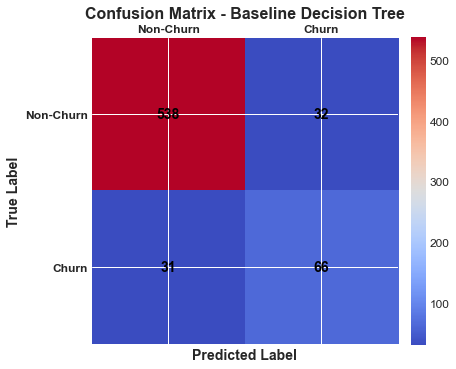

In [30]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Compute confusion matrix
cm_dt = confusion_matrix(y_test, y_pred_vanilla, labels=[False, True])

# Plot confusion matrix
fig, ax = plt.subplots(figsize=(6,6))
im = ax.matshow(cm_dt, cmap='coolwarm')  # Use matshow for coloring

# Add colorbar with height matching the matrix
cbar = plt.colorbar(im, ax=ax, fraction=0.046, pad=0.04)
cbar.ax.tick_params(labelsize=12)

# Annotate each cell
for i in range(cm_dt.shape[0]):
    for j in range(cm_dt.shape[1]):
        ax.text(j, i, cm_dt[i, j], ha='center', va='center', color='black', fontsize=14, fontweight='bold')

# Set axis labels and ticks
ax.set_xticks([0,1])
ax.set_yticks([0,1])
ax.set_xticklabels(['Non-Churn', 'Churn'], fontsize=12, fontweight='bold')
ax.set_yticklabels(['Non-Churn', 'Churn'], fontsize=12, fontweight='bold')
ax.set_xlabel('Predicted Label', fontsize=14, fontweight='bold')
ax.set_ylabel('True Label', fontsize=14, fontweight='bold')
plt.title("Confusion Matrix - Baseline Decision Tree", fontsize=16, fontweight='bold')

# Confusion Matrix - Baseline Decision Tree
# Remove spines (top, bottom, left, right) for clean look
for spine in ax.spines.values():
    spine.set_visible(False)
    

# Save the plot
# plt.savefig("Images/cm_baselinetrees.png", dpi=300, bbox_inches="tight", facecolor="white")

plt.show()


#### Business Context:

This model provides a practical way for the company to identify customers who are most likely to churn. By highlighting these at-risk customers, the business can implement targeted retention strategies such as personalized promotions, loyalty rewards, or tailored communication. At the same time, the model helps minimize unnecessary interventions for loyal customers, ensuring resources are focused efficiently and maximizing the return on retention efforts.

- ### Optimized Decision Tree
---

This model builds on the baseline Decision Tree by :
- tuning **key hyperparameters** such as max_depth, min_samples_split, min_samples_leaf, and max_features to improve predictive performance and reduce overfitting. We determine the optimal values through systematic computation and visualization.
- Train the model with these hyperparameters
- Evaluate its performance using **key metrics and the ROC curve**

### Max_deph

The model performs best with a maximum depth of 7, which controls how complex the tree can grow. This depth helps prevent overfitting while capturing important patterns in the data. At this setting, the test AUC reaches 0.81, indicating good predictive ability.

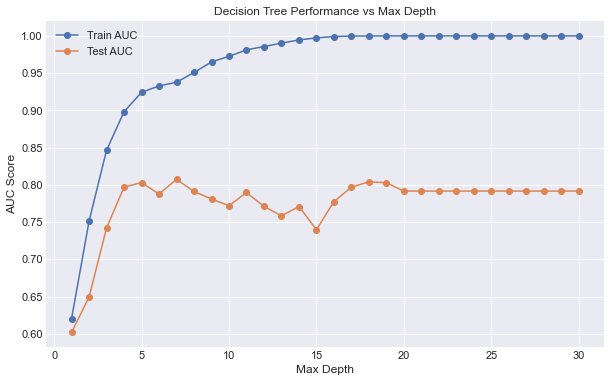

Optimal max_depth: 7
Test AUC at optimal depth: 0.81


In [19]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score

# Range of max_depth values
depths = range(1, 31)

train_auc = []
test_auc = []

for d in depths:
    model = DecisionTreeClassifier(max_depth=d, random_state=42)
    model.fit(X_train_processed, y_train)
    
    y_train_score = model.predict_proba(X_train_processed)[:, 1]
    y_test_score = model.predict_proba(X_test_processed)[:, 1]
    
    train_auc.append(roc_auc_score(y_train, y_train_score))
    test_auc.append(roc_auc_score(y_test, y_test_score))

# Plot
plt.figure(figsize=(10,6))
plt.plot(depths, train_auc, label="Train AUC", marker='o')
plt.plot(depths, test_auc, label="Test AUC", marker='o')
plt.xlabel("Max Depth")
plt.ylabel("AUC Score")
plt.title("Decision Tree Performance vs Max Depth")
plt.legend()
plt.grid(True)
plt.show()

# Best value
best_depth = depths[np.argmax(test_auc)]
print(f"Optimal max_depth: {best_depth}")
print(f"Test AUC at optimal depth: {round(max(test_auc), 2)}")


### min_samples_split

Setting min_samples_split to 0.1 ensures that a node must have at least 10% of the samples to be split, preventing overly specific splits. This helps the tree generalize better, achieving a test AUC of 0.82.

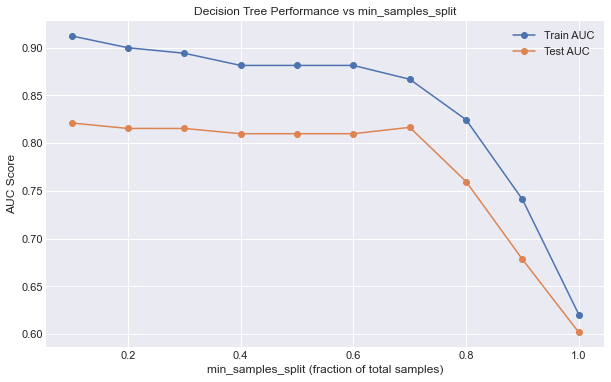

Optimal min_samples_split: 0.1
Test AUC at optimal min_samples_split: 0.82


In [19]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score

# Fractions of samples for min_samples_split (10% → 100%)
min_splits = np.arange(0.1, 1.1, 0.1)

train_auc = []
test_auc = []

for m in min_splits:
    model = DecisionTreeClassifier(min_samples_split=m, random_state=42)
    model.fit(X_train_processed, y_train)
    
    y_train_score = model.predict_proba(X_train_processed)[:, 1]
    y_test_score = model.predict_proba(X_test_processed)[:, 1]
    
    train_auc.append(roc_auc_score(y_train, y_train_score))
    test_auc.append(roc_auc_score(y_test, y_test_score))

# Plot
plt.figure(figsize=(10,6))
plt.plot(min_splits, train_auc, label="Train AUC", marker='o')
plt.plot(min_splits, test_auc, label="Test AUC", marker='o')
plt.xlabel("min_samples_split (fraction of total samples)")
plt.ylabel("AUC Score")
plt.title("Decision Tree Performance vs min_samples_split")
plt.legend()
plt.grid(True)
plt.show()

# Best value
best_index = np.argmax(test_auc)
print(f"Optimal min_samples_split: {min_splits[best_index]}")
print(f"Test AUC at optimal min_samples_split: {round(test_auc[best_index], 2)}")


### min_samples_leaf

Requiring at least 16 samples per leaf prevents the tree from creating very small, specific branches. This improves generalization and yields a higher test AUC of 0.86.

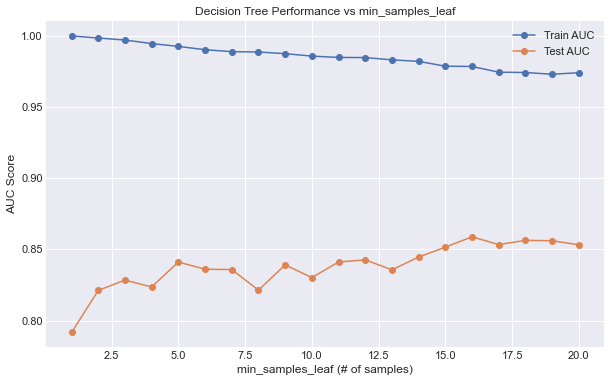

Optimal min_samples_leaf: 16
Test AUC at optimal min_samples_leaf: 0.86


In [20]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score

# Integer values for min_samples_leaf (from 1 to 20)
min_leafs = range(1, 21)

train_auc = []
test_auc = []

for leaf in min_leafs:
    model = DecisionTreeClassifier(min_samples_leaf=leaf, random_state=42)
    model.fit(X_train_processed, y_train)
    
    y_train_score = model.predict_proba(X_train_processed)[:, 1]
    y_test_score = model.predict_proba(X_test_processed)[:, 1]
    
    train_auc.append(roc_auc_score(y_train, y_train_score))
    test_auc.append(roc_auc_score(y_test, y_test_score))

# Plot
plt.figure(figsize=(10,6))
plt.plot(min_leafs, train_auc, label="Train AUC", marker='o')
plt.plot(min_leafs, test_auc, label="Test AUC", marker='o')
plt.xlabel("min_samples_leaf (# of samples)")
plt.ylabel("AUC Score")
plt.title("Decision Tree Performance vs min_samples_leaf")
plt.legend()
plt.grid(True)
plt.show()

# Best value
best_index = np.argmax(test_auc)
print(f"Optimal min_samples_leaf: {min_leafs[best_index]}")
print(f"Test AUC at optimal min_samples_leaf: {round(test_auc[best_index], 2)}")


### max_feature

Considering 29 features at each split allows the tree to capture more relevant information, improving predictive performance with a test AUC of 0.82.

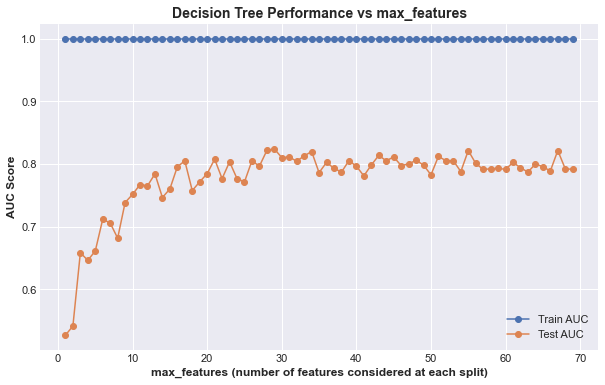

Optimal max_features: 29
Test AUC at optimal max_features: 0.82


In [21]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score

# Range of max_features values (1 to total number of features)
n_features = X_train_processed.shape[1]
max_features_range = range(1, n_features + 1)

# Lists to store AUC scores
train_auc = []
test_auc = []

# Loop over each max_features value
for mf in max_features_range:
    model = DecisionTreeClassifier(max_features=mf, random_state=42)
    model.fit(X_train_processed, y_train)
    
    # Predict probabilities for train and test sets
    y_train_score = model.predict_proba(X_train_processed)[:, 1]
    y_test_score = model.predict_proba(X_test_processed)[:, 1]
    
    # Calculate AUC
    train_auc.append(roc_auc_score(y_train, y_train_score))
    test_auc.append(roc_auc_score(y_test, y_test_score))

# Plot train vs test AUC
plt.figure(figsize=(10,6))
plt.plot(max_features_range, train_auc, label="Train AUC", marker='o')
plt.plot(max_features_range, test_auc, label="Test AUC", marker='o')
plt.xlabel("max_features (number of features considered at each split)", fontsize=12, fontweight='bold')
plt.ylabel("AUC Score", fontsize=12, fontweight='bold')
plt.title("Decision Tree Performance vs max_features", fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True)
plt.show()

# Print the best max_features based on test AUC
best_index = np.argmax(test_auc)
print(f"Optimal max_features: {max_features_range[best_index]}")
print(f"Test AUC at optimal max_features: {round(test_auc[best_index], 2)}")


### Train the model

In [22]:
# Apply SMOTE on training data
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train_processed, y_train)

# Train the Decision Tree with optimal hyperparameters
dt_best = DecisionTreeClassifier(
    max_depth=7,
    min_samples_split=0.1,
    min_samples_leaf=16,
    max_features=29,
    random_state=42
)

# Fit the model
dt_best.fit(X_train_res, y_train_res)

# dt_best now stores the trained model
# You can use it to predict on test data
y_pred_dt = dt_best.predict(X_test_processed)
y_proba_dt = dt_best.predict_proba(X_test_processed)[:, 1]

# You can now pass dt_best to plot_tree (as you did)


### The Plot

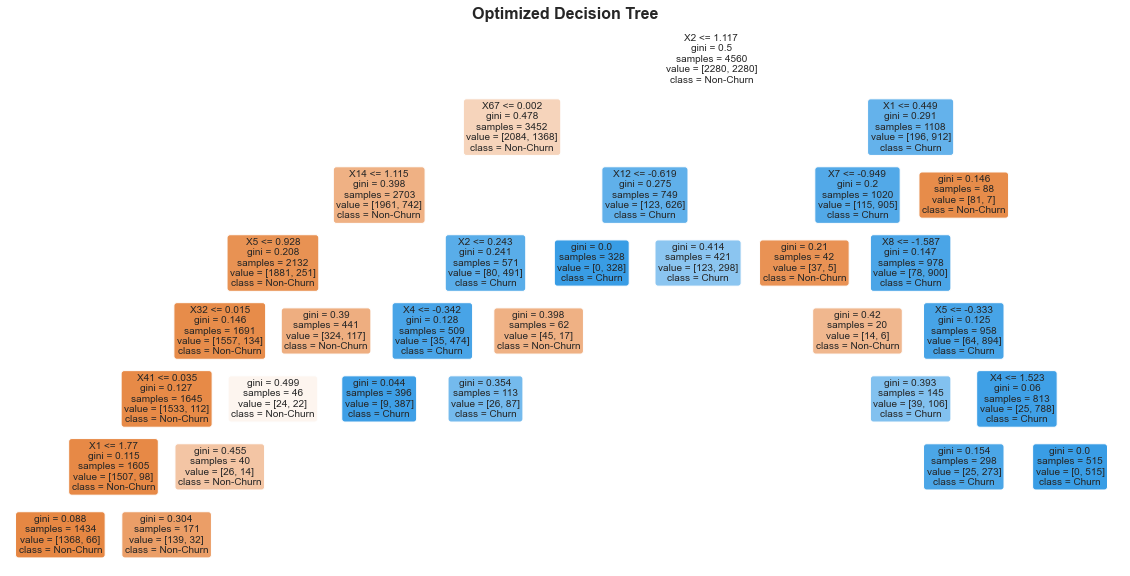

In [23]:
# Step 1: Get feature names correctly
# If you used a ColumnTransformer named 'preprocessor'
try:
    feature_names = preprocessor.get_feature_names_out()
except:
    # Fallback: just use generic names
    feature_names = [f'X{i}' for i in range(X_train_processed.shape[1])]

# Step 2: Plot the decision tree
plt.figure(figsize=(20,10))

plot_tree(
    dt_best,
    filled=True,
    feature_names=feature_names,
    class_names=['Non-Churn','Churn'],
    rounded=True,
    fontsize=10
)
plt.title("Optimized Decision Tree", fontsize=16, fontweight='bold')

# plt.savefig("Images/optimizedtree.png", dpi=300, bbox_inches="tight", facecolor="white")

plt.show()


### Confusion matrix

The model is highly effective at recognizing non-churners (TN = 495), which helps avoid unnecessary retention actions for the majority of loyal customers.
It captures a moderate portion of actual churners (TP = 62), but some churners are still missed (FN = 35), indicating that recall for churn prediction can be further improved.
The number of false positives (FP = 75) shows that some loyal customers may receive retention efforts unnecessarily. While this increases campaign costs, it is generally less harmful than missing true churners.

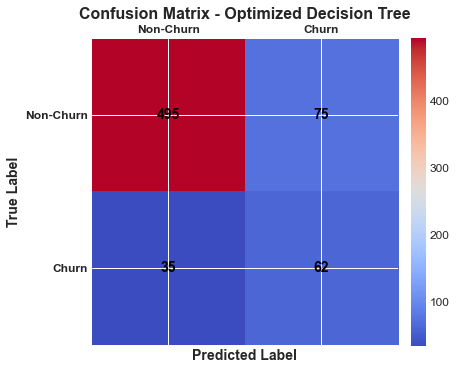

In [24]:
# Compute confusion matrix
cm_dt = confusion_matrix(y_test, y_pred_dt, labels=[False, True])

# Create display object
disp_dt = ConfusionMatrixDisplay(confusion_matrix=cm_dt, display_labels=['Non-Churn', 'Churn'])

# Plot confusion matrix
fig, ax = plt.subplots(figsize=(6,6))
im = ax.matshow(cm_dt, cmap='coolwarm')  # Use matshow to control colorbar

# Add colorbar with the same height as the matrix
cbar = plt.colorbar(im, ax=ax, fraction=0.046, pad=0.04)
cbar.ax.tick_params(labelsize=12)

# Annotate each cell
for i in range(cm_dt.shape[0]):
    for j in range(cm_dt.shape[1]):
        ax.text(j, i, cm_dt[i, j], ha='center', va='center', color='black', fontsize=14, fontweight='bold')

# Set axis labels and ticks
ax.set_xticks([0,1])
ax.set_yticks([0,1])
ax.set_xticklabels(['Non-Churn', 'Churn'], fontsize=12, fontweight='bold')
ax.set_yticklabels(['Non-Churn', 'Churn'], fontsize=12, fontweight='bold')
ax.set_xlabel('Predicted Label', fontsize=14, fontweight='bold')
ax.set_ylabel('True Label', fontsize=14, fontweight='bold')
plt.title("Confusion Matrix - Optimized Decision Tree", fontsize=16, fontweight='bold')

# plt.savefig("Images/cm_optimizedtree.png", dpi=300, bbox_inches="tight", facecolor="white")

plt.show()


- #### Business context:

The Decision Tree model can support Digicel’s retention strategy by identifying customers at risk of leaving. While not perfect, it successfully pinpoints many churners, enabling the company to take proactive measures such as special offers, loyalty programs, or personalized communication. The trade-off of mistakenly targeting some loyal customers is acceptable compared to the potential revenue loss from missed churners.

### Key metrics

The model correctly predicts 84% of all customers in the test set. Among customers who actually churn, it identifies 64% of them (recall), though only 45% of those predicted as churn actually churn (precision), showing a moderate balance between capturing churners and limiting false positives. For non-churners, the model performs very well, correctly classifying the majority with high precision (93%) and good recall (87%).

In [25]:
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Accuracy
acc = accuracy_score(y_test, y_pred_dt)

# Precision, Recall, F1-score
precision = precision_score(y_test, y_pred_dt)
recall = recall_score(y_test, y_pred_dt)
f1 = f1_score(y_test, y_pred_dt)

# ROC-AUC
auc_dt = roc_auc_score(y_test, y_proba_dt)

print("Key Metrics for Decision Tree Model:")
print(f"Accuracy: {acc:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1:.2f}")
print(f"AUC Score: {auc_dt:.2f}")

# Optional: full classification report
print("\nFull Classification Report:")
print(classification_report(y_test, y_pred_dt, target_names=['Non-Churn', 'Churn']))


Key Metrics for Decision Tree Model:
Accuracy: 0.84
Precision: 0.45
Recall: 0.64
F1-score: 0.53
AUC Score: 0.82

Full Classification Report:
              precision    recall  f1-score   support

   Non-Churn       0.93      0.87      0.90       570
       Churn       0.45      0.64      0.53        97

    accuracy                           0.84       667
   macro avg       0.69      0.75      0.71       667
weighted avg       0.86      0.84      0.85       667



- #### Business Context:

This model can effectively highlight customers at risk of leaving, enabling targeted retention strategies such as personalized promotions, loyalty programs, or proactive customer support. Some false positives exist, so a few non-churners may be flagged unnecessarily, but this trade-off is acceptable to prevent potential revenue loss from actual churners.

### ROC curve

The Decision Tree achieves an AUC score of 0.82, which shows it is slightly stronger than the logistic regression model (0.80) in distinguishing churners from non-churners. This means the model has an 82% chance of ranking a randomly chosen churner higher than a randomly chosen non-churner based on predicted probabilities.

The ROC curve being consistently above the diagonal baseline indicates the model is reliably better than random guessing. While the performance is strong, the shape of the curve also suggests there are trade-offs — some churners are still missed, and some non-churners are falsely flagged as churners.

AUC Score: 0.82


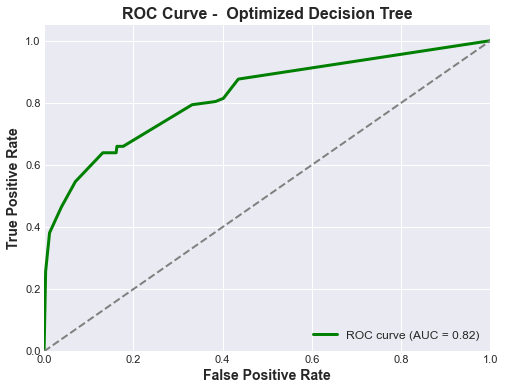

In [26]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Predict probabilities for the positive class (Churn=True)
y_proba_dt = dt_best.predict_proba(X_test_processed)[:, 1]

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba_dt)

# Compute AUC
auc_score_dt = roc_auc_score(y_test, y_proba_dt)

# Print AUC score
print(f"AUC Score: {auc_score_dt:.2f}")

# Plot ROC curve
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='green', lw=3, label=f'ROC curve (AUC = {auc_score_dt:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=14, fontweight='bold')
plt.ylabel('True Positive Rate', fontsize=14, fontweight='bold')
plt.title('ROC Curve -  Optimized Decision Tree', fontsize=16, fontweight='bold')
plt.legend(loc="lower right", fontsize=12)
plt.grid(True)

# plt.savefig("Images/optimizedtreeroc.png", dpi=300, bbox_inches="tight", facecolor="white")

plt.show()


- #### Business context:

With an AUC of 0.82, the Decision Tree provides Digicel with a highly interpretable and fairly accurate tool for churn prediction. Its predictive power supports targeted retention campaigns, ensuring that customers most at risk are prioritized for offers and interventions.

The slight edge over logistic regression suggests that the Decision Tree could be the preferred model when interpretability and accuracy are both valued, though the business must still balance false positives (extra costs in retention efforts) with false negatives (missed opportunities to save churners).

- ### Commentary and Remarks:

Surprisingly, the baseline (vanilla) tree performs better in accuracy, precision, recall, and F1-score for both churn and non-churn classes, despite the optimized model having slightly higher AUC.

This can happen because the optimized tree, with tuned hyperparameters, may be more conservative or regularized, reducing overfitting but also lowering the prediction rates on this specific test set.

In practical terms, the vanilla model is currently better at identifying churners correctly and gives higher overall predictive performance for this dataset.

AUC difference is minimal (0.01), so it does not outweigh the better performance of the vanilla tree in real predictions.

- ### Business Implication:

For practical retention strategies, the vanilla model is currently more reliable, correctly identifying a higher proportion of churners and non-churners.

The optimized model demonstrates the benefits of hyperparameter tuning in theory, but further refinements, cross-validation, or balancing techniques would be needed for it to consistently outperform the baseline on real data.

Conclusion:
For this dataset, the vanilla Decision Tree is the preferred model due to its superior balance between precision, recall, and overall accuracy, providing actionable insights for customer retention efforts.

### Key Insights or Results

## Business Recommendations

### 1. Implement Proactive Retention Programs.  
---

- **Target High-Risk Customers :**  

The predictive model identifies customers likely to churn, allowing the company to act before they leave. Retention efforts such as personalized offers, loyalty rewards, or priority support can be directed to these segments. This ensures that the company invests resources efficiently, focusing on customers whose retention has the highest impact.

- **Minimize Unnecessary Interventions :**  

By relying on model predictions, the company can avoid sending promotions to low-risk customers, reducing costs and preserving goodwill. This approach balances targeted engagement with operational efficiency. Retention programs become smarter, and customer satisfaction remains high.

### 2. Prioritize High-Value Customers.  
---

- **Focus on Profitability:**  

Not all churners are equally profitable. By combining churn predictions with metrics like customer lifetime value (CLV), the company can prioritize interventions on the most valuable customers.

- **Maximize Return on Retention Investments :**  

This ensures marketing and retention budgets are focused where they generate the highest financial impact. Lower-value customers may still receive light-touch interventions, preserving resources for strategic accounts.

### 3. Enhance Service and Marketing Strategies.   
---

- **Leverage Insights from Model Patterns :**  

The decision tree model highlights patterns linked to churn, such as specific service plans, usage behaviors, or tenure. Understanding these drivers allows for better product or service adjustments tailored to at-risk segments.

- **Personalized Marketing Campaigns :**  

Use these insights to design targeted campaigns, promotions, or upselling strategies that appeal to predicted churners. This approach increases engagement and the likelihood of retaining customers.

### 4. Continuously Monitor and Improve the Predictive Model.  
---

- **Integrate Model in Operations :**   

Deploy the churn model into daily operations to flag at-risk customers in real-time. This ensures timely retention actions and a proactive approach to customer management.

- **Regularly Update and Validate :**  

Customer behavior and market conditions change over time, so monitoring performance metrics like AUC, precision, and recall is crucial. Periodic retraining with fresh data maintains accuracy and strengthens predictive power.

## Conclusion

---

This predictive analysis provides a comprehensive view of customer churn patterns in the telecommunications sector, offering actionable insights to retain high-value clients and reduce revenue loss.

**Key findings indicate that :**

- **Non-churners are easily identifiable :** The models demonstrate high accuracy in predicting loyal customers, meaning retention resources can be focused where they are truly needed, minimizing waste on customers unlikely to leave.

- **Churners require targeted strategies :** While the models capture a moderate portion of actual churners, some are missed, highlighting the need for predictive targeting to focus retention efforts on the most at-risk customers effectively.

- **Baseline (vanilla) Decision Tree performs robustly :** Surprisingly, the simple, untuned model often outperformed the optimized version in key metrics like accuracy and F1-score, suggesting that for this dataset, over-tuning may introduce unnecessary complexity without improving business outcomes.

- **Predictive insights enable proactive actions :** Leveraging these models allows the company to implement personalized retention programs, loyalty incentives, and data-driven engagement strategies that maximize customer lifetime value and reduce potential churn-related revenue losses.

Overall, the analysis shows that by combining predictive modeling with strategic retention initiatives, the company can make informed, data-driven decisions to maintain customer loyalty, optimize resource allocation, and protect revenue streams effectively.

### Next Steps

---

- **Continuously monitor churn patterns :** Track customer behavior and engagement metrics regularly to detect early signs of churn and validate predictive model performance.

- **Refine predictive models :** Update and retrain models with new data, exploring additional features or alternative algorithms to improve accuracy and recall for identifying at-risk customers.

- **Implement targeted retention strategies :** Use model predictions to design personalized retention programs, loyalty incentives, or proactive outreach campaigns focused on the most at-risk segments.

- **Evaluate business impact :** Measure the effectiveness of retention initiatives by tracking churn reduction, revenue retention, and ROI, adjusting strategies based on observed outcomes.

- **Integrate predictive insights into CRM systems :** Embed churn scores and risk categories into operational systems to guide sales, support, and marketing teams in real-time decision-making.